In [4]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Import Datasets

In [12]:
import os
os.chdir('C:\\Users\\Homes')

In [13]:
pwd()

'C:\\Users\\Homes'

In [21]:
# Import Movies Dataset
dfMovies = pd.read_csv("C:\\Users\\Homes/movies.dat",sep="::",names=["MovieID","Title","Genres"],engine='python')
dfMovies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [22]:
# Import Ratings Dataset
dfRatings = pd.read_csv("C:\\Users\\Homes/ratings.dat",sep="::",names=["UserID","MovieID","Rating","Timestamp"],engine='python')
dfRatings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [23]:
# Import users Dataset
dfUsers = pd.read_csv("C:\\Users\\Homes/users.dat",sep="::",names=["UserID","Gender","Age","Occupation","Zip-code"],engine='python')
dfUsers.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [24]:
dfMovies.shape

(3883, 3)

In [25]:
dfUsers.shape

(6040, 5)

In [26]:
dfRatings.shape

(1000209, 4)

## Create a new dataset [Master_Data]

In [27]:
dfMovieRatings = dfMovies.merge(dfRatings,on='MovieID',how='inner')
dfMovieRatings.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [28]:
# to check whether merging does not changes any dataset
dfMovieRatings.shape

(1000209, 6)

In [29]:
dfMaster = dfMovieRatings.merge(dfUsers,on="UserID",how='inner')
dfMaster.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [30]:
dfMaster.to_csv("Master.csv")

## Explore the datasets using visual representations

### User Age Distribution

In [31]:
# Users with Different Age Groups
dfMaster['Age'].value_counts()

25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27211
Name: Age, dtype: int64

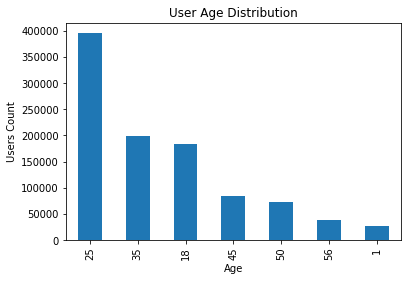

In [32]:
# Plot for users with different age groups
dfMaster['Age'].value_counts().plot(kind='bar')
plt.xlabel("Age")
plt.title("User Age Distribution")
plt.ylabel('Users Count')
plt.show()

### User rating of the movie “Toy Story”

In [33]:
# Toy Story
toystoryRating = dfMaster[dfMaster['Title'].str.contains('Toy Story') == True]
toystoryRating

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
50,3114,Toy Story 2 (1999),Animation|Children's|Comedy,1,4,978302174,F,1,10,48067
53,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008,F,50,9,55117
124,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496,M,25,12,11413
263,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952,M,25,17,61614
...,...,...,...,...,...,...,...,...,...,...
998988,3114,Toy Story 2 (1999),Animation|Children's|Comedy,3023,4,970471948,F,25,7,92108
999027,3114,Toy Story 2 (1999),Animation|Children's|Comedy,5800,5,958015250,M,35,18,90804
999486,3114,Toy Story 2 (1999),Animation|Children's|Comedy,2189,4,974607816,M,1,10,60148
999869,3114,Toy Story 2 (1999),Animation|Children's|Comedy,159,4,989966944,F,45,0,37922


In [34]:
toystoryRating.groupby(["Title","Rating"]).size()

Title               Rating
Toy Story (1995)    1          16
                    2          61
                    3         345
                    4         835
                    5         820
Toy Story 2 (1999)  1          25
                    2          44
                    3         214
                    4         578
                    5         724
dtype: int64

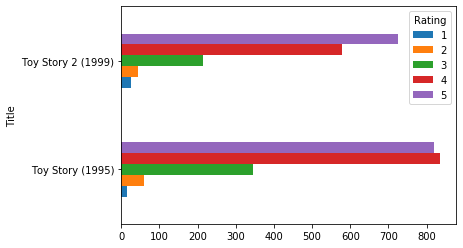

In [35]:
toystoryRating.groupby(["Title","Rating"]).size().unstack().plot(kind='barh',stacked=False,legend=True)
plt.show()

### Top 25 movies by viewership rating

In [36]:
dfTop25 = dfMaster.groupby('Title').size().sort_values(ascending=False)[:25]
dfTop25

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

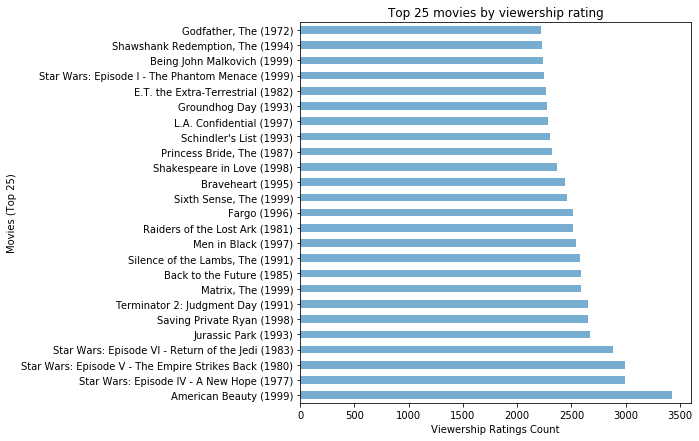

In [37]:
dfTop25.plot(kind='barh',alpha=0.6,figsize=(7,7))
plt.xlabel("Viewership Ratings Count")
plt.ylabel("Movies (Top 25)")
plt.title("Top 25 movies by viewership rating")
plt.show()


### Find the ratings for all the movies reviewed by for a particular user of user id = 2696

In [38]:
userId = 2696
userRatingById = dfMaster[dfMaster["UserID"] == userId]
userRatingById

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
991035,350,"Client, The (1994)",Drama|Mystery|Thriller,2696,3,973308886,M,25,7,24210
991036,800,Lone Star (1996),Drama|Mystery,2696,5,973308842,M,25,7,24210
991037,1092,Basic Instinct (1992),Mystery|Thriller,2696,4,973308886,M,25,7,24210
991038,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,2696,3,973308690,M,25,7,24210
991039,1258,"Shining, The (1980)",Horror,2696,4,973308710,M,25,7,24210
991040,1270,Back to the Future (1985),Comedy|Sci-Fi,2696,2,973308676,M,25,7,24210
991041,1589,Cop Land (1997),Crime|Drama|Mystery,2696,3,973308865,M,25,7,24210
991042,1617,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,2696,4,973308842,M,25,7,24210
991043,1625,"Game, The (1997)",Mystery|Thriller,2696,4,973308842,M,25,7,24210
991044,1644,I Know What You Did Last Summer (1997),Horror|Mystery|Thriller,2696,2,973308920,M,25,7,24210


## Feature Engineering

### Find out all the unique genres 

In [39]:
#dfGenres = dfMaster[]
dfGenres = dfMaster['Genres'].str.split("|")

In [40]:
dfGenres

0                    [Animation, Children's, Comedy]
1          [Animation, Children's, Musical, Romance]
2                                            [Drama]
3               [Action, Adventure, Fantasy, Sci-Fi]
4                                       [Drama, War]
                             ...                    
1000204                            [Drama, Thriller]
1000205                   [Comedy, Horror, Thriller]
1000206                            [Comedy, Romance]
1000207                           [Action, Thriller]
1000208                              [Action, Drama]
Name: Genres, Length: 1000209, dtype: object

In [41]:

listGenres = set()
for genre in dfGenres:
    listGenres = listGenres.union(set(genre))

In [42]:
# All Unique genres
listGenres

{'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

### Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 

In [43]:
ratingsOneHot = dfMaster['Genres'].str.get_dummies("|")

In [44]:
ratingsOneHot.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [45]:
dfMaster = pd.concat([dfMaster,ratingsOneHot],axis=1)

In [46]:
dfMaster.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,...,0,0,0,1,0,1,0,0,0,0
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,...,1,0,0,0,0,0,1,0,0,0
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067,...,0,0,0,0,0,0,0,0,1,0


In [47]:
dfMaster.columns

Index(['MovieID', 'Title', 'Genres', 'UserID', 'Rating', 'Timestamp', 'Gender',
       'Age', 'Occupation', 'Zip-code', 'Action', 'Adventure', 'Animation',
       'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western'],
      dtype='object')

In [48]:
dfMaster.to_csv("Final_Master.csv")

### Determine the features affecting the ratings of any particular movie.

In [49]:
dfMaster[["title","Year"]] = dfMaster.Title.str.extract("(.)\s\((.\d+)",expand=True)

In [50]:
dfMaster = dfMaster.drop(columns=["title"])
dfMaster.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,1995
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,...,0,0,1,0,1,0,0,0,0,1995
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,1995
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,...,0,0,0,0,0,1,0,0,0,1977
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067,...,0,0,0,0,0,0,0,1,0,1993


In [51]:
dfMaster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 29 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   MovieID      1000209 non-null  int64 
 1   Title        1000209 non-null  object
 2   Genres       1000209 non-null  object
 3   UserID       1000209 non-null  int64 
 4   Rating       1000209 non-null  int64 
 5   Timestamp    1000209 non-null  int64 
 6   Gender       1000209 non-null  object
 7   Age          1000209 non-null  int64 
 8   Occupation   1000209 non-null  int64 
 9   Zip-code     1000209 non-null  object
 10  Action       1000209 non-null  int64 
 11  Adventure    1000209 non-null  int64 
 12  Animation    1000209 non-null  int64 
 13  Children's   1000209 non-null  int64 
 14  Comedy       1000209 non-null  int64 
 15  Crime        1000209 non-null  int64 
 16  Documentary  1000209 non-null  int64 
 17  Drama        1000209 non-null  int64 
 18  Fantasy      1000209 n

In [52]:
dfMaster['Year'] = dfMaster.Year.astype(int)

In [53]:
dfMaster['Movie_Age'] = 2000 - dfMaster.Year
dfMaster.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year,Movie_Age
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,...,0,0,0,0,0,0,0,0,1995,5
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,...,0,1,0,1,0,0,0,0,1995,5
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,...,0,0,0,0,0,0,0,0,1995,5
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,...,0,0,0,0,1,0,0,0,1977,23
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067,...,0,0,0,0,0,0,1,0,1993,7


In [54]:
dfMaster['Gender'] = dfMaster.Gender.str.replace('F','1')

In [55]:
dfMaster['Gender'] = dfMaster.Gender.str.replace('M','0')

In [56]:
dfMaster['Gender'] = dfMaster.Gender.astype(int)

In [57]:
dfMaster.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year,Movie_Age
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,1,1,10,48067,...,0,0,0,0,0,0,0,0,1995,5
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,1,1,10,48067,...,0,1,0,1,0,0,0,0,1995,5
2,150,Apollo 13 (1995),Drama,1,5,978301777,1,1,10,48067,...,0,0,0,0,0,0,0,0,1995,5
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,1,1,10,48067,...,0,0,0,0,1,0,0,0,1977,23
4,527,Schindler's List (1993),Drama|War,1,5,978824195,1,1,10,48067,...,0,0,0,0,0,0,1,0,1993,7


In [60]:
dfGenderAffecting = dfMaster.groupby('Gender').size().sort_values(ascending=False)[:25]
dfGenderAffecting

Gender
0    753769
1    246440
dtype: int64

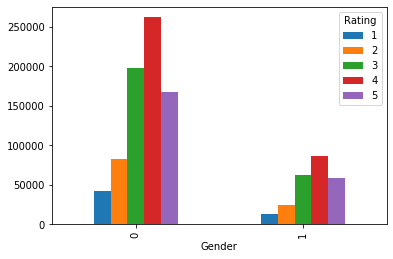

In [61]:
dfMaster.groupby(["Gender","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

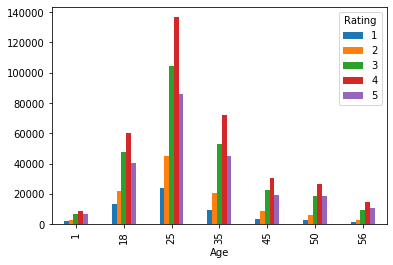

In [62]:
dfMaster.groupby(["Age","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

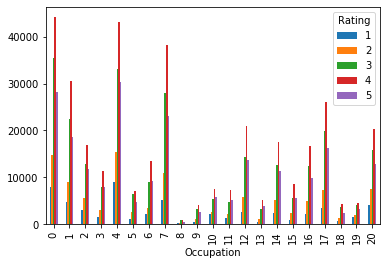

In [63]:
dfMaster.groupby(["Occupation","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

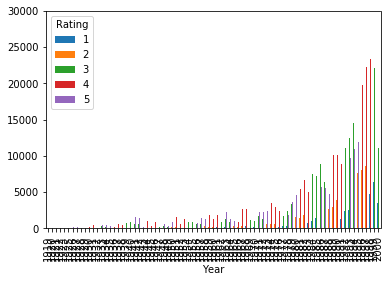

In [64]:
dfMaster.groupby(["Year","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

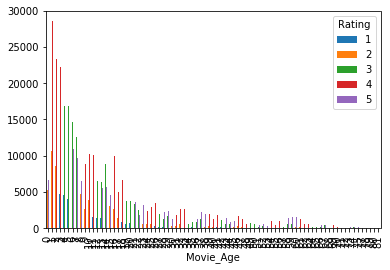

In [65]:
dfMaster.groupby(["Movie_Age","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

### Develop an appropriate model to predict the movie ratings

In [66]:
#First 500 extracted records
first_500 = dfMaster[:1000]

In [67]:
first_500

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year,Movie_Age
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,1,1,10,48067,...,0,0,0,0,0,0,0,0,1995,5
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,1,1,10,48067,...,0,1,0,1,0,0,0,0,1995,5
2,150,Apollo 13 (1995),Drama,1,5,978301777,1,1,10,48067,...,0,0,0,0,0,0,0,0,1995,5
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,1,1,10,48067,...,0,0,0,0,1,0,0,0,1977,23
4,527,Schindler's List (1993),Drama|War,1,5,978824195,1,1,10,48067,...,0,0,0,0,0,0,1,0,1993,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2384,Babe: Pig in the City (1998),Children's|Comedy,18,2,978155233,1,18,3,95825,...,0,0,0,0,0,0,0,0,1998,2
996,2391,"Simple Plan, A (1998)",Crime|Thriller,18,1,978155685,1,18,3,95825,...,0,0,0,0,0,1,0,0,1998,2
997,2394,"Prince of Egypt, The (1998)",Animation|Musical,18,4,978154907,1,18,3,95825,...,0,1,0,0,0,0,0,0,1998,2
998,2402,Rambo: First Blood Part II (1985),Action|War,18,2,978153894,1,18,3,95825,...,0,0,0,0,0,0,1,0,1985,15


In [70]:
#Use the following features:movie id,age,occupation
features = first_500[['MovieID','Age','Occupation']].values
features

array([[   1,    1,   10],
       [  48,    1,   10],
       [ 150,    1,   10],
       ...,
       [2394,   18,    3],
       [2402,   18,    3],
       [2404,   18,    3]], dtype=int64)

In [71]:
#Use rating as label
labels = first_500[['Rating']].values
labels

array([[5],
       [5],
       [5],
       [4],
       [5],
       [4],
       [4],
       [4],
       [5],
       [4],
       [3],
       [3],
       [3],
       [4],
       [3],
       [4],
       [4],
       [5],
       [5],
       [5],
       [5],
       [4],
       [5],
       [3],
       [4],
       [4],
       [5],
       [5],
       [4],
       [4],
       [4],
       [5],
       [4],
       [5],
       [4],
       [4],
       [5],
       [4],
       [3],
       [3],
       [5],
       [4],
       [3],
       [4],
       [4],
       [4],
       [4],
       [5],
       [4],
       [5],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [5],
       [5],
       [4],
       [2],
       [4],
       [4],
       [3],
       [4],
       [4],
       [4],
       [3],
       [4],
       [5],
       [4],
       [4],
       [5],
       [4],
       [3],
       [4],
       [4],
       [5],
       [4],
       [5],
       [4],
       [4],
       [3],
       [3],
    

In [72]:
#Create train and test data set
train, test, train_labels, test_labels = train_test_split(features,labels,test_size=0.33,random_state=42)

In [73]:
train

array([[3035,   35,    1],
       [1393,   25,   17],
       [3198,   35,    1],
       ...,
       [1073,   18,    3],
       [ 784,   35,    1],
       [2802,   50,    9]], dtype=int64)

In [74]:
test

array([[1265,   35,    1],
       [3408,   35,    1],
       [3447,   35,    1],
       [2423,   35,    1],
       [ 539,   35,    1],
       [2657,   35,    1],
       [2109,   35,    1],
       [1247,   35,    1],
       [1064,   18,    3],
       [ 105,   25,   12],
       [ 421,   18,    3],
       [1035,   50,    9],
       [2140,   35,    1],
       [2140,   18,    3],
       [2000,   18,    3],
       [1527,   18,    3],
       [ 508,   25,   17],
       [1275,   18,    3],
       [3704,   35,    1],
       [1653,   25,   17],
       [1380,   35,    1],
       [1027,   25,   12],
       [   7,   35,    1],
       [1282,   35,    1],
       [2006,   25,   12],
       [2712,   25,   12],
       [2506,   50,    9],
       [2278,   18,    3],
       [1562,   18,    3],
       [2021,   18,    3],
       [3114,   25,   17],
       [ 150,   25,   12],
       [2094,   35,    1],
       [1203,   35,    1],
       [   2,   35,    1],
       [1693,   25,   12],
       [2795,   35,    1],
 

In [75]:
train_labels

array([[3],
       [3],
       [3],
       [3],
       [5],
       [5],
       [2],
       [4],
       [4],
       [5],
       [5],
       [4],
       [5],
       [3],
       [4],
       [5],
       [4],
       [5],
       [5],
       [3],
       [3],
       [3],
       [5],
       [4],
       [3],
       [4],
       [4],
       [4],
       [3],
       [5],
       [5],
       [4],
       [4],
       [5],
       [4],
       [4],
       [4],
       [5],
       [5],
       [4],
       [5],
       [4],
       [4],
       [5],
       [4],
       [4],
       [5],
       [3],
       [5],
       [3],
       [5],
       [4],
       [5],
       [3],
       [5],
       [4],
       [4],
       [3],
       [3],
       [4],
       [4],
       [4],
       [3],
       [5],
       [5],
       [5],
       [4],
       [4],
       [5],
       [4],
       [4],
       [3],
       [5],
       [5],
       [4],
       [5],
       [4],
       [5],
       [4],
       [4],
       [5],
       [4],
       [3],
    

In [76]:
test_labels

array([[5],
       [4],
       [5],
       [5],
       [5],
       [4],
       [4],
       [3],
       [2],
       [4],
       [4],
       [5],
       [5],
       [4],
       [4],
       [4],
       [3],
       [5],
       [2],
       [4],
       [5],
       [4],
       [4],
       [5],
       [3],
       [3],
       [3],
       [3],
       [1],
       [4],
       [4],
       [4],
       [4],
       [3],
       [5],
       [3],
       [3],
       [4],
       [1],
       [2],
       [5],
       [3],
       [3],
       [5],
       [4],
       [3],
       [1],
       [3],
       [4],
       [1],
       [4],
       [5],
       [3],
       [2],
       [3],
       [4],
       [5],
       [3],
       [3],
       [1],
       [4],
       [4],
       [5],
       [5],
       [5],
       [4],
       [5],
       [1],
       [4],
       [4],
       [5],
       [5],
       [4],
       [5],
       [3],
       [4],
       [4],
       [3],
       [5],
       [3],
       [4],
       [3],
       [3],
    

In [77]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(train, train_labels)
Y_pred = logreg.predict(test)
acc_log = round(logreg.score(train, train_labels) * 100, 2)
acc_log

C:\Users\Homes\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Homes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


36.72

In [78]:
# Support Vector Machines

svc = SVC()
svc.fit(train, train_labels)
Y_pred = svc.predict(test)
acc_svc = round(svc.score(train, train_labels) * 100, 2)
acc_svc

C:\Users\Homes\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


38.81

In [79]:
# K Nearest Neighbors Classifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train, train_labels)
Y_pred = knn.predict(test)
acc_knn = round(knn.score(train, train_labels) * 100, 2)
acc_knn

C:\Users\Homes\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


59.7

In [80]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(train, train_labels)
Y_pred = gaussian.predict(test)
acc_gaussian = round(gaussian.score(train, train_labels) * 100, 2)
acc_gaussian

C:\Users\Homes\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


39.55

In [81]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(train, train_labels)
Y_pred = perceptron.predict(test)
acc_perceptron = round(perceptron.score(train, train_labels) * 100, 2)
acc_perceptron

C:\Users\Homes\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


34.33

In [82]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(train, train_labels)
Y_pred = linear_svc.predict(test)
acc_linear_svc = round(linear_svc.score(train, train_labels) * 100, 2)
acc_linear_svc

C:\Users\Homes\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Homes\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


34.48

In [83]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(train, train_labels)
Y_pred = sgd.predict(test)
acc_sgd = round(sgd.score(train, train_labels) * 100, 2)
acc_sgd

C:\Users\Homes\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


34.18

In [84]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(train, train_labels)
Y_pred = decision_tree.predict(test)
acc_decision_tree = round(decision_tree.score(train, train_labels) * 100, 2)
acc_decision_tree

100.0

In [85]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train, train_labels)
Y_pred = random_forest.predict(test)
random_forest.score(train, train_labels)
acc_random_forest = round(random_forest.score(train, train_labels) * 100, 2)
acc_random_forest

C:\Users\Homes\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


99.85

In [86]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
8,Decision Tree,100.00
3,Random Forest,99.85
1,KNN,59.70
4,Naive Bayes,39.55
0,Support Vector Machines,38.81
2,Logistic Regression,36.72
7,Linear SVC,34.48
5,Perceptron,34.33
6,Stochastic Gradient Decent,34.18
